<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means II by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [135]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})

from sklearn.cluster import KMeans

plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

### 1. Import the data

In [31]:
csv_file = 'dat/ais.csv'
ais = pd.read_csv(csv_file)

### 2. Do some EDA of relationships between features.

In [32]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   rcc         202 non-null    float64
 2   wcc         202 non-null    float64
 3   hc          202 non-null    float64
 4   hg          202 non-null    float64
 5   ferr        202 non-null    int64  
 6   bmi         202 non-null    float64
 7   ssf         202 non-null    float64
 8   pcBfat      202 non-null    float64
 9   lbm         202 non-null    float64
 10  ht          202 non-null    float64
 11  wt          202 non-null    float64
 12  sex         202 non-null    object 
 13  sport       202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [33]:
ais.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,202.0,101.500000,58.456537,1.00,51.2500,101.500,151.750,202.00
rcc,202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
wcc,202.0,7.108911,1.800337,3.30,5.9000,6.850,8.275,14.30
hc,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
hg,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
ferr,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
bmi,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
ssf,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
pcBfat,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52
lbm,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00


In [34]:
ais.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

In [35]:
ais.duplicated().sum()

0

In [36]:
ais.corr()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
Unnamed: 0,1.000000,0.658358,0.153908,0.660805,0.689778,0.441281,0.266935,-0.543638,-0.674826,0.579148,0.317385,0.370171
rcc,0.658358,1.000000,0.147064,0.924964,0.888800,0.250865,0.299471,-0.403004,-0.493512,0.550975,0.358854,0.403763
wcc,0.153908,0.147064,1.000000,0.153333,0.134720,0.132073,0.176968,0.136999,0.107960,0.102663,0.076811,0.155662
hc,0.660805,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,-0.532449,0.583375,0.371192,0.423711
hg,0.689778,0.888800,0.134720,0.950757,1.000000,0.308391,0.382524,-0.435429,-0.531522,0.610986,0.352322,0.455263
ferr,0.441281,0.250865,0.132073,0.258240,0.308391,1.000000,0.302556,-0.108243,-0.183386,0.317581,0.123255,0.273702
bmi,0.266935,0.299471,0.176968,0.320527,0.382524,0.302556,1.000000,0.321116,0.187558,0.713858,0.337097,0.845934
ssf,-0.543638,-0.403004,0.136999,-0.449135,-0.435429,-0.108243,0.321116,1.000000,0.963017,-0.207749,-0.071253,0.154196
pcBfat,-0.674826,-0.493512,0.107960,-0.532449,-0.531522,-0.183386,0.187558,0.963017,1.000000,-0.361850,-0.188022,-0.000193
lbm,0.579148,0.550975,0.102663,0.583375,0.610986,0.317581,0.713858,-0.207749,-0.361850,1.000000,0.802119,0.930913


In [37]:
ais.drop(ais.columns[0], axis=1, inplace=True)
ais

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
198,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
199,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis
200,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1,m,Tennis


### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [39]:
# ANSWER
#ssf, pcBfat, ibm, wt, hg, hc

In [53]:
y = ais.sex
y.head()

0    f
1    f
2    f
3    f
4    f
Name: sex, dtype: object

In [54]:
predictor_columns = [c for c in ais.columns if c != 'sex' and c != 'sport' and c != 'sport']
X = pd.DataFrame(ais, columns = predictor_columns)
X.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [140]:
# ANSWER

# 2 Clusters
kmeans_2 = KMeans(n_clusters=2, random_state=0)
kmeans_2.fit(X, y)
#kmeans.cluster_centers_


KMeans(n_clusters=2, random_state=0)

In [141]:
# ANSWER

# 4 Clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(X, y)

KMeans(n_clusters=4, random_state=0)

### 5. Get the Labels of each point 

In [142]:
# ANSWER
kmeans_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0])

In [143]:
# ANSWER
kmeans_4.labels_

array([2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       3, 2, 3, 3, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 3, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3,
       3, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 3, 0, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 0, 3, 1, 3,
       0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 3, 1, 3, 1, 3, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 3, 1, 3, 0, 2, 2, 0, 3, 3, 3, 3, 1, 3, 1, 3, 0, 0, 1, 3,
       1, 3, 0, 1])

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the `inertia` attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [126]:
# ANSWER
Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    print('k = %i: ' % k, kmeans.inertia_)



F:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k = 1:  772163.8116782176
k = 2:  461735.41499036556
k = 3:  326376.1578621592
k = 4:  246201.13884962804
k = 5:  216076.16619217693
k = 6:  190253.5680756016
k = 7:  170850.80521494415
k = 8:  152637.08533948538
k = 9:  141990.61687858895
k = 10:  131893.81523544452
k = 11:  122752.37266711729
k = 12:  113116.2795807065
k = 13:  106400.62341376806
k = 14:  104591.07059784378


In [130]:
# ANSWER
Sum_of_squared_distances_t = []

k = 2
kmeans_t = KMeans(n_clusters=k, random_state=0)
Sum_of_squared_distances_t.append(kmeans_t)
#print('k = %i: ' % k, kmeans_t.inertia_)

while kmeans_t != 0:
    
    k += 1
    kmeans_t = KMeans(n_clusters=k, random_state=0)
    kmeans_t.fit(X, y)
    Sum_of_squared_distances_t.append(kmeans_t)
    print('k = %i: ' % k, kmeans_t.inertia_)


k = 3:  326376.1578621592
k = 4:  246201.13884962804
k = 5:  216076.16619217693
k = 6:  190253.5680756016
k = 7:  170850.80521494415
k = 8:  152637.08533948538
k = 9:  141990.61687858895
k = 10:  131893.81523544452
k = 11:  122752.37266711729
k = 12:  113116.2795807065
k = 13:  106400.62341376806
k = 14:  104591.07059784378
k = 15:  95617.48332848221
k = 16:  89551.02364668502
k = 17:  85934.78937464317
k = 18:  81513.37091289677
k = 19:  78422.74300250692
k = 20:  74016.21450381412
k = 21:  72241.8236434772
k = 22:  68717.02458457436
k = 23:  65831.00573053089
k = 24:  61578.35603651393
k = 25:  61897.56031497679
k = 26:  59506.43004016984
k = 27:  57412.92294383466
k = 28:  53689.866250534964
k = 29:  52871.59232020052
k = 30:  51894.94200772733
k = 31:  49870.41633214645
k = 32:  48680.866936145525
k = 33:  47207.69683837578
k = 34:  44994.6374639394
k = 35:  44437.75577291127
k = 36:  44145.8102505435
k = 37:  41837.34751961983
k = 38:  41367.39685578645
k = 39:  39798.16458105033


ValueError: n_samples=202 should be >= n_clusters=203.

Plot the sum of squared distances vs. k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

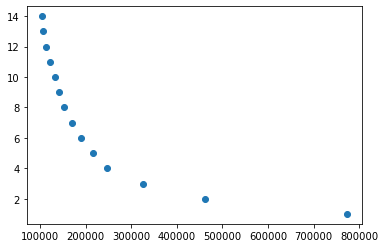

In [131]:
# ANSWER
plt.scatter(Sum_of_squared_distances, K)

### 7. Plot `pcBfat` vs. `wt` using the clusters from each model.

- Plot pcBfat, wt using hue = sex
- Plot pcBfat, wt using hue = labels indentified by the model


F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pcBfat', ylabel='wt'>

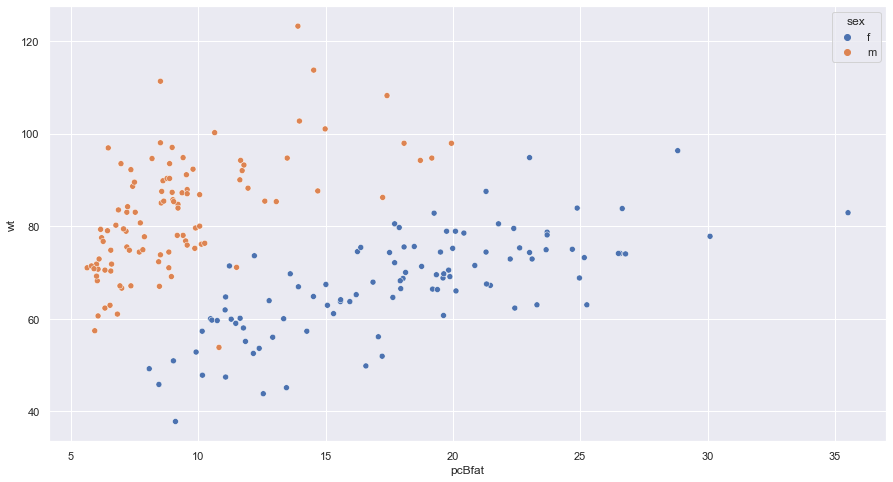

In [136]:
# ANSWER
sns.scatterplot(ais.pcBfat, ais.wt, hue=ais.sex)

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pcBfat', ylabel='wt'>

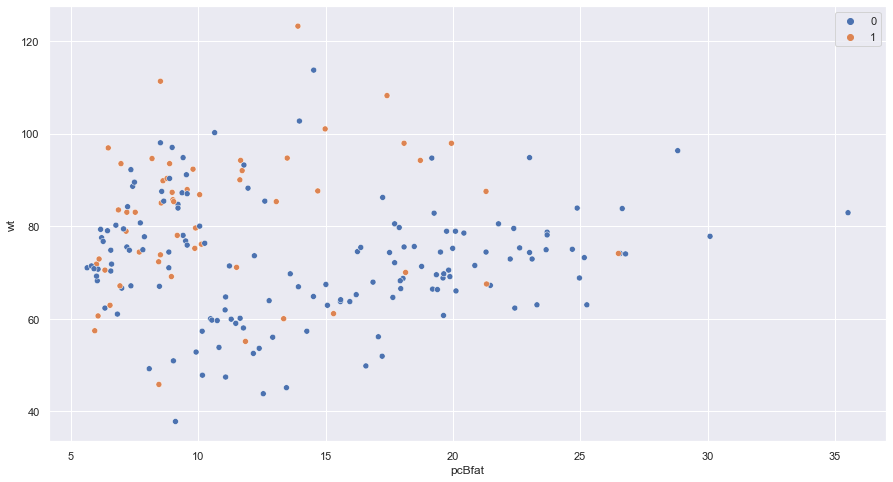

In [139]:
sns.scatterplot(ais.pcBfat, ais.wt, hue=kmeans_2.labels_)

Repeat for k = 4

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pcBfat', ylabel='wt'>

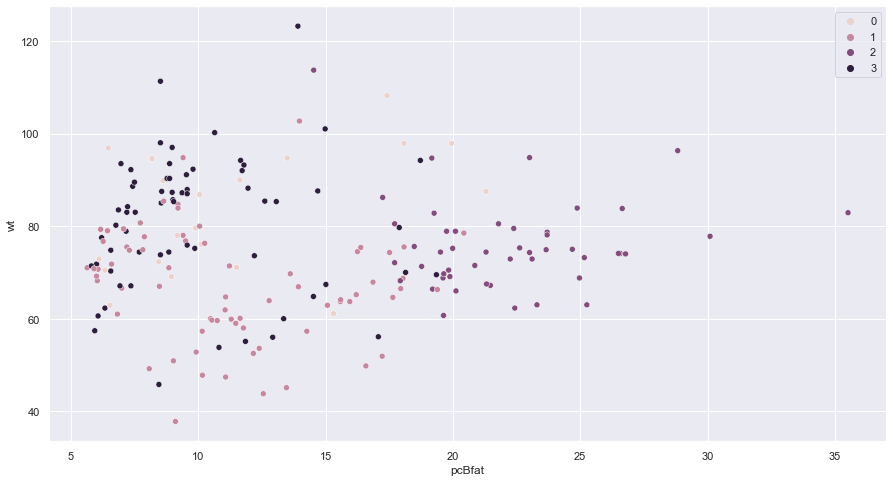

In [144]:
# ANSWER

# 4 Clusters

sns.scatterplot(ais.pcBfat, ais.wt, hue=kmeans_4.labels_)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



